In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,Text
import operator
import string

df = pd.read_csv("reuters_news.csv")

In [2]:
#Convert date_posted from string type to date type
df.date_posted = pd.to_datetime(df.date_posted, format = '%Y/%m/%d')
# Sort by timestamp first, to get these by chronological order
df = df.sort_values(by = "date_posted", ascending=False)
df.head()

,article_body,category,date_posted,title
0,SYDNEY/MONTREAL (Reuters) - Global regulators ...,Middle East & Africa,2020-11-19,Analysis: As regulators prepare to weigh in on...
164,The world's second-largest cinema chain is als...,Media and Telecoms,2020-11-19,Cineworld considers CVA to survive the coronav...
138,LONDON (Reuters) - With bitcoin surging to the...,India Top News,2020-11-19,Analysis: Another bitcoin bubble? This time it...
154,VANCOUVER (Reuters) - Lawyers for Huawei Chief...,Business News,2020-11-19,Huawei defense probes Canada border official i...
155,"(Reuters) - Judy Shelton, Republican President...",Business News,2020-11-19,Trump Fed nominee Shelton faces more difficult...


In [3]:
df.tail(n=5)

,article_body,category,date_posted,title
194,WASHINGTON (Reuters) - U.S. consumer sentiment...,Business News,2020-11-13,U.S. consumer sentiment ebbs; producer prices ...
195,"""We are aligning our approach to venture inves...",Media Industry,2020-11-13,Comcast to make its venture capital firm part ...
183,SANTIAGO (Reuters) - Joe Biden's win in the U....,Healthcare & Pharmaceuticals,2020-11-13,Exclusive: Chile health minister hopes Biden v...
181,WASHINGTON (Reuters) - The Securities and Exch...,U.S. Legal News,2020-11-13,SEC charges former Wells Fargo CEO and top exe...
180,WASHINGTON (Reuters) - The Trump administratio...,APAC,2020-11-13,ByteDance gets 15-day extension on U.S. order ...


In [4]:
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

def remove_stop_words(article):
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())   
    stop_words = set(stopwords.words('english'))
    stop_words.update(["also", "could", "inc", "said", "reuters", "since", "told", "would"])
    word_list_without_stop_words=list()
    article= word_tokenize(article)
    wnl = nltk.WordNetLemmatizer()
    filtered_article=[w for w in  article if w in english_vocab and not w in stop_words]              
    
    return filtered_article

In [5]:
from nltk.probability import ConditionalFreqDist 
import en_core_web_sm
from pprint import pprint
from collections import Counter


most_common_20_words=list()

def most_common_20_words_Chart(list_of_words):
    dict_words_list=dict()
    dict_words_list=dict(list_of_words)
    # Python code to convert into dictionary 
    f, ax = plt.subplots(figsize=(20,10))
    ax.barh(list(dict_words_list.keys()), dict_words_list.values(), color='#5DADE2')
    plt.title("Appearance of 20 most common words", fontdict={'fontsize': 20})
    ax.set_xlabel('Number of appearances', fontsize=20)
    ax.tick_params(axis='both', labelsize=20)
    ax.legend(fontsize=20)


def cfdst_Data(article):  
        print("__________________________________________ Confidential Frequency Distribution Plot for POS tag__________________________________________")  
              
        cfdist=ConditionalFreqDist()        
        filtered_tokens=remove_stop_words(article)
        target=nltk.pos_tag(filtered_tokens,tagset='universal')   
        name="Business_News"
        most_common_20_words=nltk.FreqDist(Text(filtered_tokens)).most_common(20)         
        
        for (words,pos_tag) in target:
            cfdist[name][pos_tag]+=1
        cfdist.plot()
            
        i=1;
        print("__________________________________________Top 20 most common words__________________________________________")
        for (word,count) in most_common_20_words:
            print(i,":",word,"appeared",count,"times")
            i+=1
        return most_common_20_words
       

def nameEntity_Recog(article):        
        print("____________________________________________________________ ",name,"  _______________________________________________________________")        
        doc = nlp(article)        
        print('Total number of entity in ',name,' : ',len(doc .ents))
        labels = [x.label_ for x in doc.ents]
        print(Counter(labels))
        items = [x.text for x in doc.ents]
        common_entity=Counter(items).most_common(5)
        print('Top 5 most common entity : ',common_entity)
        #displacy.render(doc, jupyter=True, style='ent') 
        cfdist2=ConditionalFreqDist()
        for (w,c) in ttt:
            cfdist2[name][w]=c
        cfdist2.plot()
    

In [6]:
all_articles = df.article_body.str.cat(sep=' ')
all_articles = all_articles.lower()
all_articles_no_punctuation = remove_punctuation(all_articles)

__________________________________________ Confidential Frequency Distribution Plot for POS tag__________________________________________


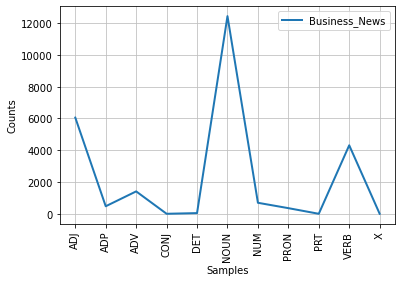

__________________________________________Top 20 most common words__________________________________________
1 : us appeared 350 times
2 : vaccine appeared 259 times
3 : billion appeared 205 times
4 : new appeared 203 times
5 : year appeared 155 times
6 : million appeared 150 times
7 : max appeared 146 times
8 : company appeared 132 times
9 : two appeared 108 times
10 : market appeared 105 times
11 : first appeared 98 times
12 : one appeared 95 times
13 : chief appeared 95 times
14 : data appeared 95 times
15 : people appeared 91 times
16 : last appeared 90 times
17 : pandemic appeared 80 times
18 : united appeared 80 times
19 : global appeared 79 times
20 : safety appeared 72 times


In [7]:
count=cfdst_Data(all_articles_no_punctuation )


No handles with labels found to put in legend.


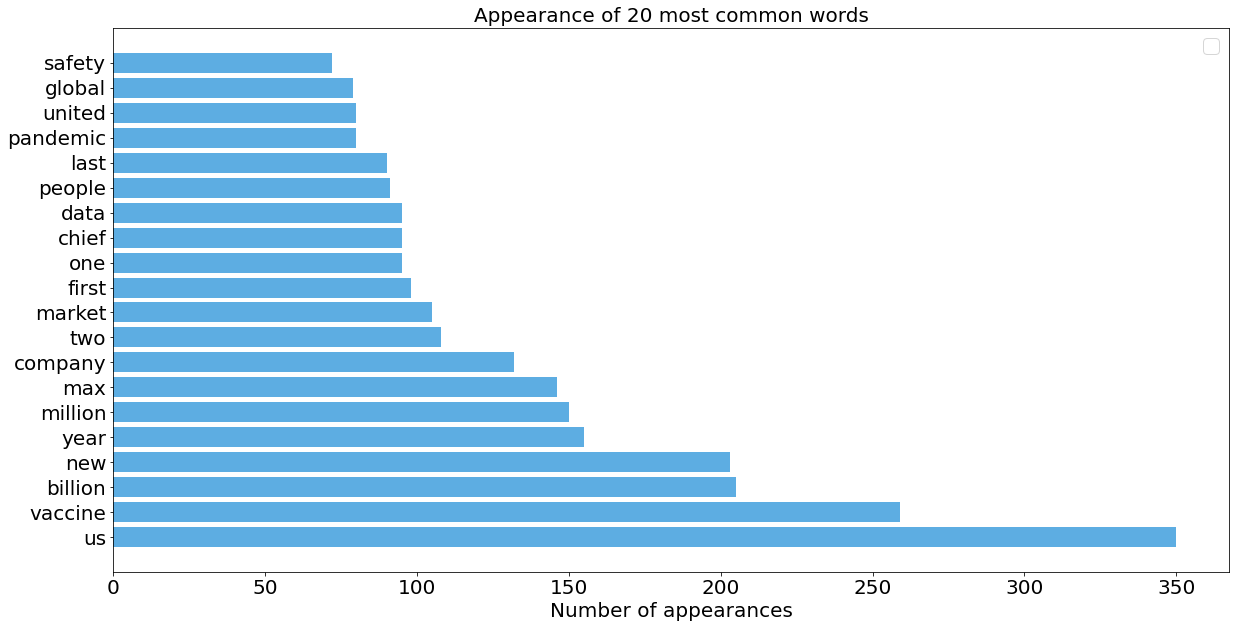

In [8]:
import matplotlib.pyplot as plt

most_20_words=most_common_20_words_Chart(count)

In [9]:
list_of_all_words = remove_stop_words(all_articles_no_punctuation)

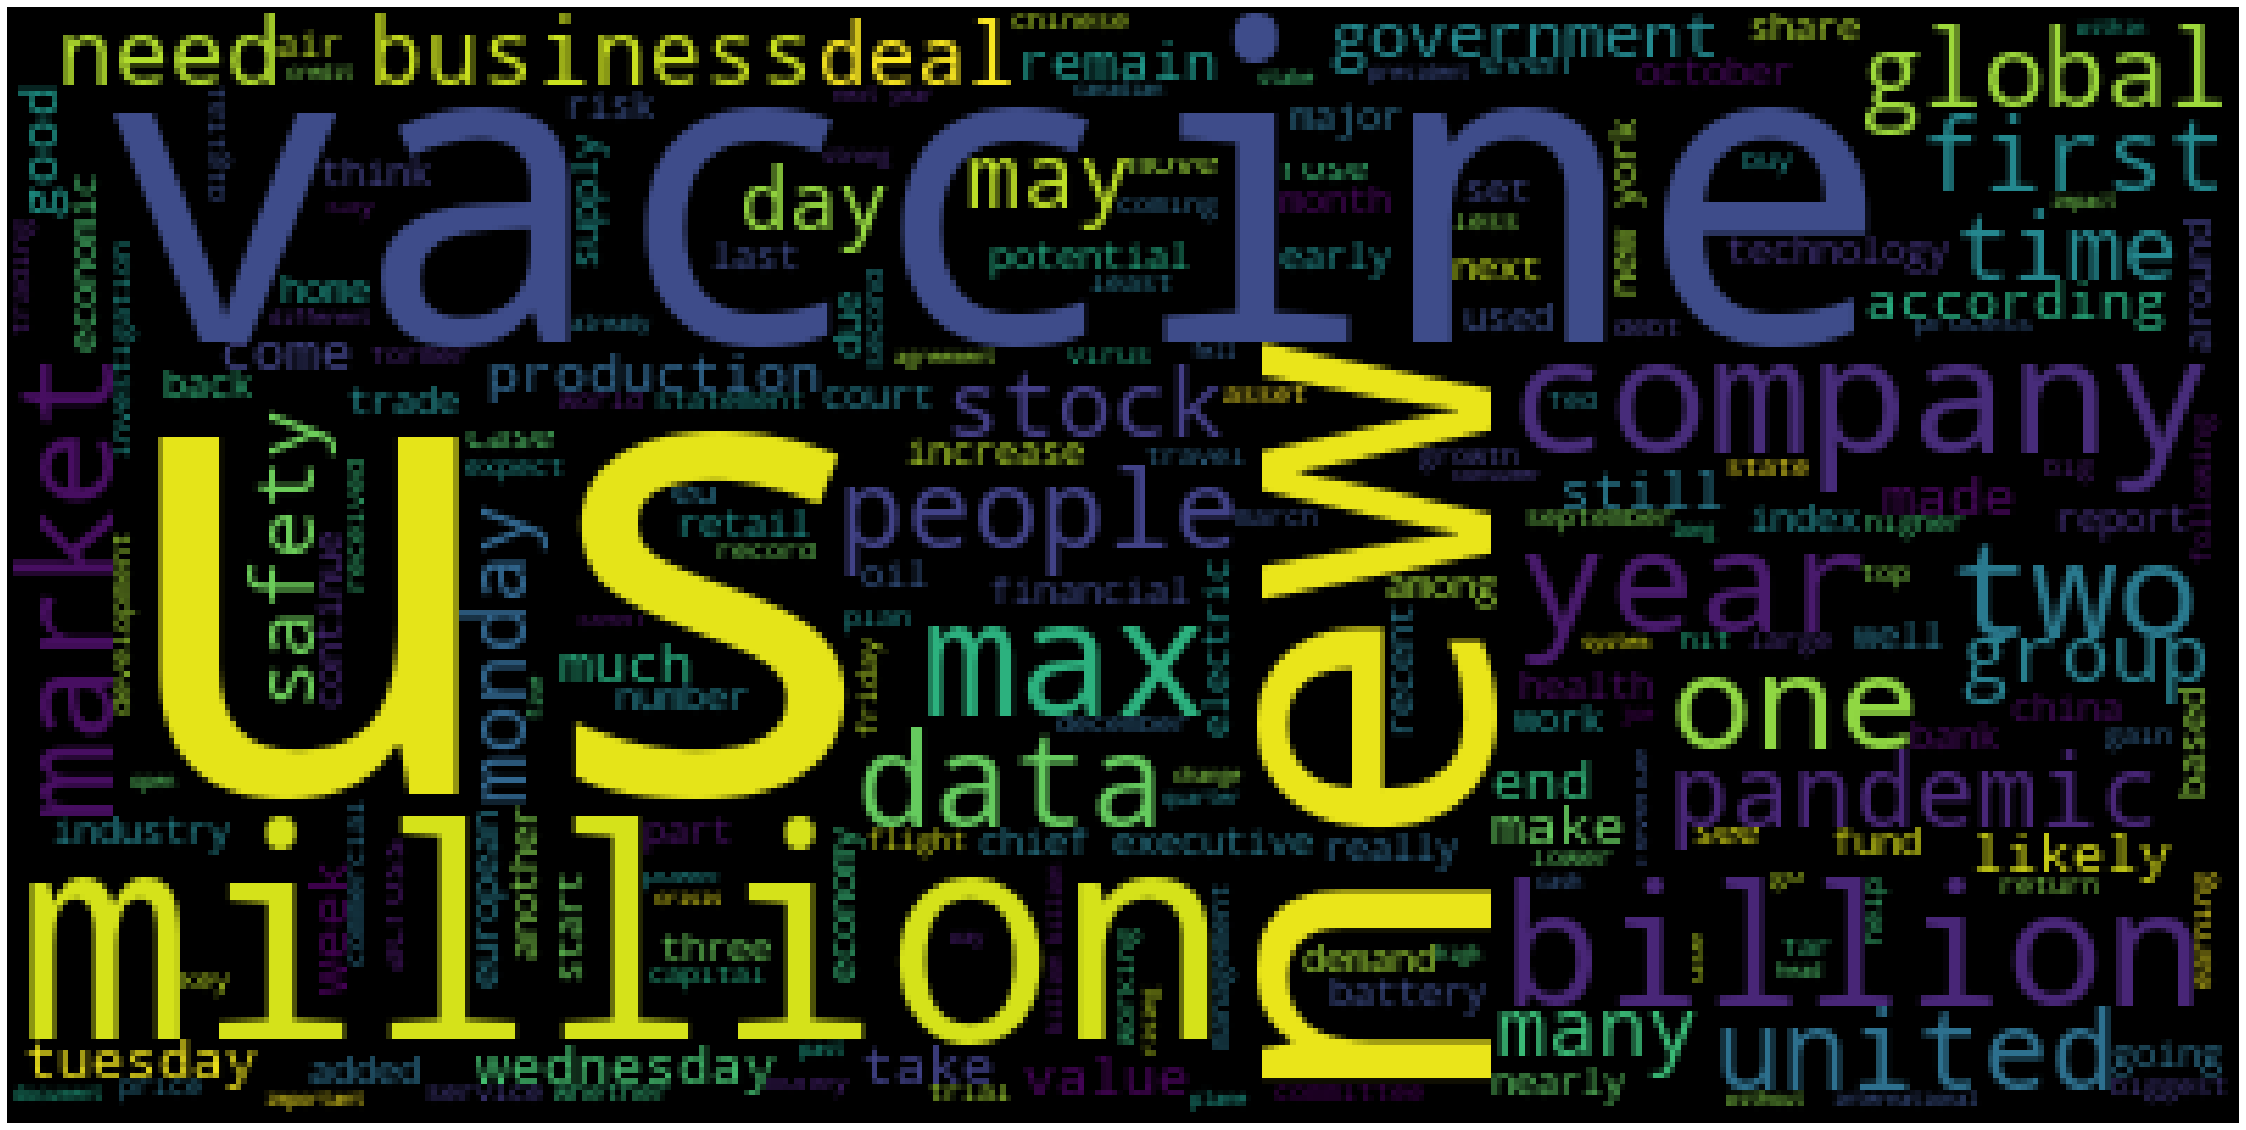

In [10]:
from wordcloud import WordCloud 

def create_wordcloud(input_string):
    wordcloud = WordCloud().generate(input_string)

    plt.figure(figsize=(40,40))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.savefig('word_count.png', bbox_inches='tight')

create_wordcloud(" ".join(list_of_all_words))

In [11]:
df["article_body_concat_by_date"] = df.groupby(["date_posted"])["article_body"].transform(lambda x: " ".join(x))
df.head(n=5)

,article_body,category,date_posted,title,article_body_concat_by_date
0,SYDNEY/MONTREAL (Reuters) - Global regulators ...,Middle East & Africa,2020-11-19,Analysis: As regulators prepare to weigh in on...,SYDNEY/MONTREAL (Reuters) - Global regulators ...
164,The world's second-largest cinema chain is als...,Media and Telecoms,2020-11-19,Cineworld considers CVA to survive the coronav...,SYDNEY/MONTREAL (Reuters) - Global regulators ...
138,LONDON (Reuters) - With bitcoin surging to the...,India Top News,2020-11-19,Analysis: Another bitcoin bubble? This time it...,SYDNEY/MONTREAL (Reuters) - Global regulators ...
154,VANCOUVER (Reuters) - Lawyers for Huawei Chief...,Business News,2020-11-19,Huawei defense probes Canada border official i...,SYDNEY/MONTREAL (Reuters) - Global regulators ...
155,"(Reuters) - Judy Shelton, Republican President...",Business News,2020-11-19,Trump Fed nominee Shelton faces more difficult...,SYDNEY/MONTREAL (Reuters) - Global regulators ...


In [12]:
n_rows = df.shape[0]
#print(range(n_rows))

dates_array = []
article_bodies_by_date = []
for i in range(n_rows):
    if df.iloc[i]["date_posted"] not in dates_array:
        dates_array.append(df.iloc[i]["date_posted"])
        article_bodies_by_date.append(df["article_body_concat_by_date"][i])

In [13]:
# Input: text of words.  Output: dictionary of the unique words and how often they appeared,
# with most frequent words listed first
def count_word_frequency(list_of_words):
   
    word_dict = {}
    for word in list_of_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    
    return word_dict


def order_dict_by_value(input_dict, descending_or_not):
    return dict(sorted(input_dict.items(), key=operator.itemgetter(1),reverse=descending_or_not))

In [14]:
article_bodies_by_date = list(map(lambda x: x.lower(), article_bodies_by_date))
article_bodies_by_date_no_punctuation = list(map(lambda x: remove_punctuation(x), article_bodies_by_date))

list_of_all_words_by_date = list(map(lambda x: remove_stop_words(x), article_bodies_by_date_no_punctuation))

count_of_all_words_by_date = list(map(lambda x: count_word_frequency(x), list_of_all_words_by_date))
count_of_all_words_by_date = list(map(lambda x: order_dict_by_value(x, True), count_of_all_words_by_date))



In [15]:
import matplotlib.dates as mdates
def plot_word_freq_over_time(word):
    count_of_word_to_track = []
    n_dates = len(dates_array)
    for i in range(n_dates):
        # print("i = ",i)
        if word in (count_of_all_words_by_date[i]).keys():
            count_of_word_to_track.append((count_of_all_words_by_date[i])[word])
        else:
            count_of_word_to_track.append(0)
    #print(count_of_word_to_track)

    fig, ax = plt.subplots(figsize=(10,5))
    #plt.rcParams["figure.figsize"] = (10,5)
    ax.bar(dates_array, count_of_word_to_track)
    fig.autofmt_xdate()
    ax.fmt_xdata = mdates.DateFormatter("%y-%m-%d")
    title = "Appearance of the word \"" + word + "\" over time"
    #ax.set_title(title)
    plt.title(title, fontdict={'fontsize': 15})
    ax.tick_params(axis='both', labelsize=10)
    plt.savefig(word+'.png', bbox_inches='tight')
    
    return dates_array, count_of_word_to_track

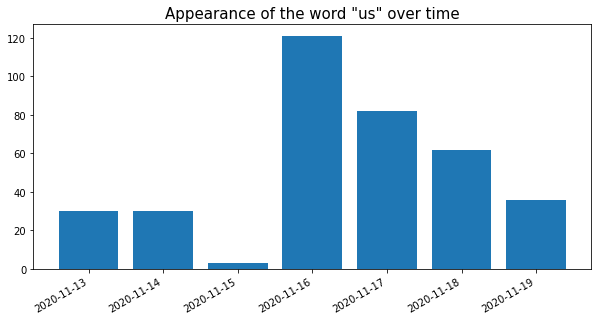

In [16]:
us = plot_word_freq_over_time("us")

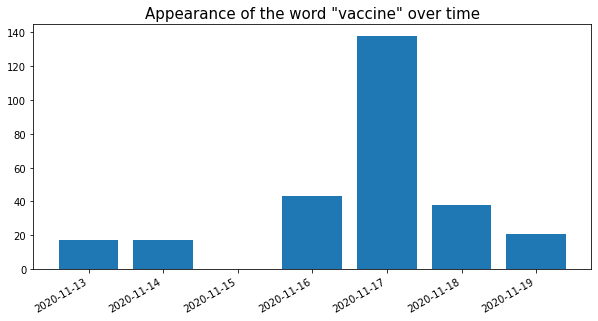

In [17]:
vaccine = plot_word_freq_over_time("vaccine")

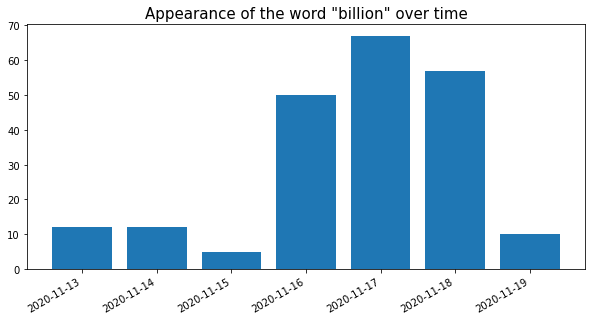

In [18]:
billion= plot_word_freq_over_time("billion")

<ipython-input-19-90fdea3890fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][i]='Healthcare & Pharmaceuticals'


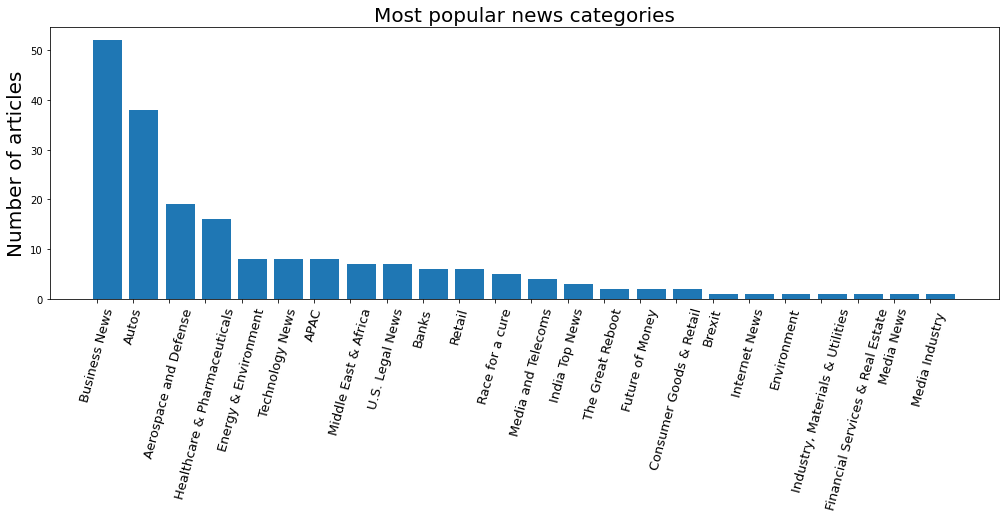

There are a total of 24 types of articles, which are
 ['Middle East & Africa' 'Media and Telecoms' 'India Top News'
 'Business News' 'Healthcare & Pharmaceuticals' 'Autos' 'Banks'
 'Aerospace and Defense' 'Retail' 'Brexit' 'The Great Reboot'
 'Energy & Environment' 'Future of Money' 'Technology News'
 'Internet News' 'U.S. Legal News' 'Consumer Goods & Retail'
 'Race for a cure' 'Environment' 'Industry, Materials & Utilities'
 'Financial Services & Real Estate' 'Media News' 'APAC' 'Media Industry ']


In [19]:

news_cats = {}
for i in df.index:
    if (df['category'][i]=='Healthcare & Pharma'):
        df['category'][i]='Healthcare & Pharmaceuticals'
    if df['category'][i] not in news_cats:
        news_cats[df['category'][i]] = 0    
    news_cats[df['category'][i]] += 1

number_of_cats = len(news_cats)
categories = []
values = []
for key in sorted(news_cats, key=news_cats.get, reverse=True)[:25]:
    categories.append(key)
    values.append(news_cats[key])
plt.figure(figsize=(17, 5))
positions = np.arange(len(categories))
plt.xticks(positions-0.3, categories, rotation=75, size=13)
plt.bar(positions,values)
plt.ylabel('Number of articles', size=20)
plt.title('Most popular news categories', size=20)
plt.savefig('Most Popular News Categories.png', bbox_inches='tight')
plt.show()

print("There are a total of",df.category.nunique(),"types of articles, which are\n",df.category.unique())


In [21]:
import nltk
from textblob import TextBlob

polarities= []
polarities_desc=[]
for i in df.index:
    text=df.iloc[i,0]
    obj = TextBlob(text)
    sentiment = obj.sentiment.polarity
    if (round(sentiment,2)>0):
        polarities.append(round(sentiment,2))
        polarities_desc.append("Positive")
    elif (round(sentiment,2)==0):
        polarities.append(round(sentiment,2))
        polarities_desc.append("Neutral")
    elif (round(sentiment,2)<0):
        polarities.append(round(sentiment,2))
        polarities_desc.append("Negative")
    
df['polarity'] = polarities
df['polarity_desc'] = polarities_desc
df.head(n=10)

,article_body,category,date_posted,title,article_body_concat_by_date,polarity,polarity_desc
0,SYDNEY/MONTREAL (Reuters) - Global regulators ...,Middle East & Africa,2020-11-19,Analysis: As regulators prepare to weigh in on...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.01,Positive
164,The world's second-largest cinema chain is als...,Media and Telecoms,2020-11-19,Cineworld considers CVA to survive the coronav...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,-0.12,Negative
138,LONDON (Reuters) - With bitcoin surging to the...,India Top News,2020-11-19,Analysis: Another bitcoin bubble? This time it...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.27,Positive
154,VANCOUVER (Reuters) - Lawyers for Huawei Chief...,Business News,2020-11-19,Huawei defense probes Canada border official i...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,-0.01,Negative
155,"(Reuters) - Judy Shelton, Republican President...",Business News,2020-11-19,Trump Fed nominee Shelton faces more difficult...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.19,Positive
156,"Speaking to Reuters TV, Chief Executive Ugur S...",Healthcare & Pharmaceuticals,2020-11-19,BioNTech says vaccine approval possible in mid...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.05,Positive
157,The vaccine's efficacy was found to be consist...,India Top News,2020-11-19,Pfizer-BioNTech vaccine deliveries could start...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.06,Positive
158,WASHINGTON/CHICAGO (Reuters) - The chief execu...,Business News,2020-11-19,U.S. airline CEOs renew request for more aid i...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.10,Positive
159,SYDNEY (Reuters) - Asian shares drifted off al...,Middle East & Africa,2020-11-19,"Asia stocks ease from highs, bonds count on Fe...",SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.04,Positive
161,"SHENZHEN, China (Reuters) - It's 10 p.m. in th...",Business News,2020-11-19,"In Shenzhen, the world's largest electronics m...",SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.23,Positive


In [22]:
df.head(n=20)

,article_body,category,date_posted,title,article_body_concat_by_date,polarity,polarity_desc
0,SYDNEY/MONTREAL (Reuters) - Global regulators ...,Middle East & Africa,2020-11-19,Analysis: As regulators prepare to weigh in on...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.01,Positive
164,The world's second-largest cinema chain is als...,Media and Telecoms,2020-11-19,Cineworld considers CVA to survive the coronav...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,-0.12,Negative
138,LONDON (Reuters) - With bitcoin surging to the...,India Top News,2020-11-19,Analysis: Another bitcoin bubble? This time it...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.27,Positive
154,VANCOUVER (Reuters) - Lawyers for Huawei Chief...,Business News,2020-11-19,Huawei defense probes Canada border official i...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,-0.01,Negative
155,"(Reuters) - Judy Shelton, Republican President...",Business News,2020-11-19,Trump Fed nominee Shelton faces more difficult...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.19,Positive
156,"Speaking to Reuters TV, Chief Executive Ugur S...",Healthcare & Pharmaceuticals,2020-11-19,BioNTech says vaccine approval possible in mid...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.05,Positive
157,The vaccine's efficacy was found to be consist...,India Top News,2020-11-19,Pfizer-BioNTech vaccine deliveries could start...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.06,Positive
158,WASHINGTON/CHICAGO (Reuters) - The chief execu...,Business News,2020-11-19,U.S. airline CEOs renew request for more aid i...,SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.10,Positive
159,SYDNEY (Reuters) - Asian shares drifted off al...,Middle East & Africa,2020-11-19,"Asia stocks ease from highs, bonds count on Fe...",SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.04,Positive
161,"SHENZHEN, China (Reuters) - It's 10 p.m. in th...",Business News,2020-11-19,"In Shenzhen, the world's largest electronics m...",SYDNEY/MONTREAL (Reuters) - Global regulators ...,0.23,Positive


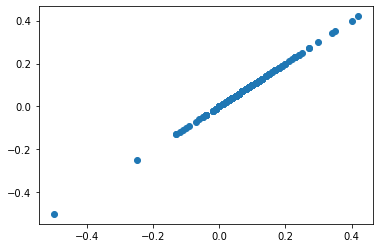

In [23]:
plt.scatter(df['polarity'].values,df['polarity'].values)
plt.show()

In [24]:
minValue =df['polarity'].min()
minValue_index=df[df['polarity']==minValue].index.values
minValue_date=df['date_posted'][minValue_index]
minValue_title=df['title'][minValue_index]
minValue_article=df['article_body'][minValue_index]
print('Minimum polarity value within a week(7 days) ', minValue)
print(minValue_index)
print(minValue_date)
print(minValue_title)
print(minValue_article)

Minimum polarity value within a week(7 days)  -0.5
[169]
169   2020-11-19
Name: date_posted, dtype: datetime64[ns]
169    EU auditors see uphill battle for EU antitrust...
Name: title, dtype: object
169    BRUSSELS (Reuters) - EU antitrust enforcers fa...
Name: article_body, dtype: object


In [25]:
maxValue =df['polarity'].max()
maxValue_index=df[df['polarity']==maxValue].index.values
maxValue_date=df['date_posted'][maxValue_index]
maxValue_title=df['title'][maxValue_index]
maxValue_article=df['article_body'][maxValue_index]
print('Maximum polarity value within a week(7 days) ', maxValue)
print(maxValue_index)
print(maxValue_date)
print(maxValue_title)
print(maxValue_article)

Maximum polarity value within a week(7 days)  0.42
[167]
167   2020-11-19
Name: date_posted, dtype: datetime64[ns]
167    Asia-Pacific leaders push for freer trade afte...
Name: title, dtype: object
167    KUALA LUMPUR (Reuters) - Asia-Pacific leaders ...
Name: article_body, dtype: object


In [26]:
daily_sentiment = list(map(lambda articles_for_that_day: TextBlob(articles_for_that_day).sentiment.polarity,article_bodies_by_date))
print(daily_sentiment)
index_with_min_sentiment = daily_sentiment.index(min(daily_sentiment))
print('Index of minimum sentiment : ',index_with_min_sentiment)

[0.0617838631065904, 0.0809281283793695, 0.10968790655541431, 0.07928369497653542, 0.052084879406307974, 0.08403366321536428, 0.08403366321536428]
Index of minimum sentiment :  4


In [27]:
print('Date : ',dates_array[index_with_min_sentiment])


Date :  2020-11-15 00:00:00


In [28]:
index_with_max_sentiment = daily_sentiment.index(max(daily_sentiment))
index_with_max_sentiment

2

In [29]:
dates_array[index_with_max_sentiment]

Timestamp('2020-11-17 00:00:00')